# FIFA 18: Data Analysis, EDA, Statistical inference

## by Selene Reyes 

In this analysis I will be exploring the FIFA18 dataset in order to understand distribution of different attributes, determine correlations between variables and find features that better explain performance of players and teams. I also performed hypothesis testing to compare mean overall scores between countries (including, of course, Chile).

## Table of Content

* [General description of data](#data)
* [Data loading](#loading)
* [Data cleaning and data wrangling](#clean)
* [Exploratory Data Analysis (EDA)](#eda)
    * [Players by Overall score and Age](#by)
   
    * [Players' Overall score by Age](#overall.age)
    * [Value and Wage](#value)
    * [Top 20 players' value](#top20)
    * [Value of players by Age and Overall score](#valueby)
    * [Number of players by country](#country)
    * [Number of top players by country](#topcountry)
    * [Number of top players by club](#topclub)
    * [Correlation matrix](#corr)
* [Statistical inference](#stat)
    * [Checking normallity of Age and Overall score](#agenorm)
    * [Probability of age and overall](#prob)
    * [Hypothesis testing](#t)
* [Conclusion](#conc)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pivottablejs import pivot_ui

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

<a id='data'></a>
## General description of data
- Every player featuring in FIFA 2018
- 70+ attributes
- Attributes based on actual data of the latest EA's FIFA 18 game
- Attributes include on all player style statistics like Dribbling, Aggression, GK Skills etc.
<br><br>
Player personal attributes (Nationality, Club, Photo, Age, Value etc.)<br>
Player performance attributes (Overall, Potential, Aggression, Agility etc.)<br>
Player preferred position and ratings at all positions.

![Positions](dir-python/Positions.png)

<a id='loading'></a>
## Data loading

In [2]:
df = pd.read_csv("dir-python/data/FIFA Players.csv", low_memory=False)
df.tail(3)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
17978,17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,...,31.0,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0
17979,17979,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,https://cdn.sofifa.org/flags/14.png,46,64,Crewe Alexandra,https://cdn.sofifa.org/24/18/teams/121.png,...,47.0,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0
17980,17980,L. Sackey,18,https://cdn.sofifa.org/48/18/players/238308.png,Ghana,https://cdn.sofifa.org/flags/117.png,46,64,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,...,40.0,45.0,30.0,38.0,29.0,30.0,31.0,29.0,38.0,31.0


<a id='clean'></a>
## Data cleaning

In [3]:
df.drop(["Unnamed: 0", "Photo", "Flag", "Club Logo", "ID"],axis=1, inplace = True)
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15746 entries, 0 to 17980
Data columns (total 70 columns):
Name                   15746 non-null object
Age                    15746 non-null int64
Nationality            15746 non-null object
Overall                15746 non-null int64
Potential              15746 non-null int64
Club                   15746 non-null object
Value                  15746 non-null object
Wage                   15746 non-null object
Special                15746 non-null int64
Acceleration           15746 non-null object
Aggression             15746 non-null object
Agility                15746 non-null object
Balance                15746 non-null object
Ball control           15746 non-null object
Composure              15746 non-null object
Crossing               15746 non-null object
Curve                  15746 non-null object
Dribbling              15746 non-null object
Finishing              15746 non-null object
Free kick accuracy     15746 non-null ob

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

In [5]:
UsefulColumns = ['Name', 
                'Age',  
                'Nationality', 
                'Overall', 
                'Value', 
                'Wage', 
                'Preferred Positions']

df2 = pd.DataFrame(df, columns=UsefulColumns)

In [6]:
df2.describe()

,Age,Overall
count,15746.000000,15746.000000
mean,24.995935,66.432618
std,4.488224,6.876939
min,16.000000,46.000000
25%,21.000000,62.000000
50%,25.000000,66.000000
75%,28.000000,71.000000
max,41.000000,94.000000


<a id='by'></a>
### Players by Overall score and Age

In [7]:
pivot_ui(df2) # See distribution of Overall or Age

**Age**: Most of the players are 25 years old (1,378). The age of players ranges from 16 to 41.<br><br>
**Overall**: Most of the players have an overall score of 66. Overall score ranges between 46 to 94. The shape of Overall score is approximately normally distributed.

<a id='overall.age'></a>
### Players' Overall score by Age

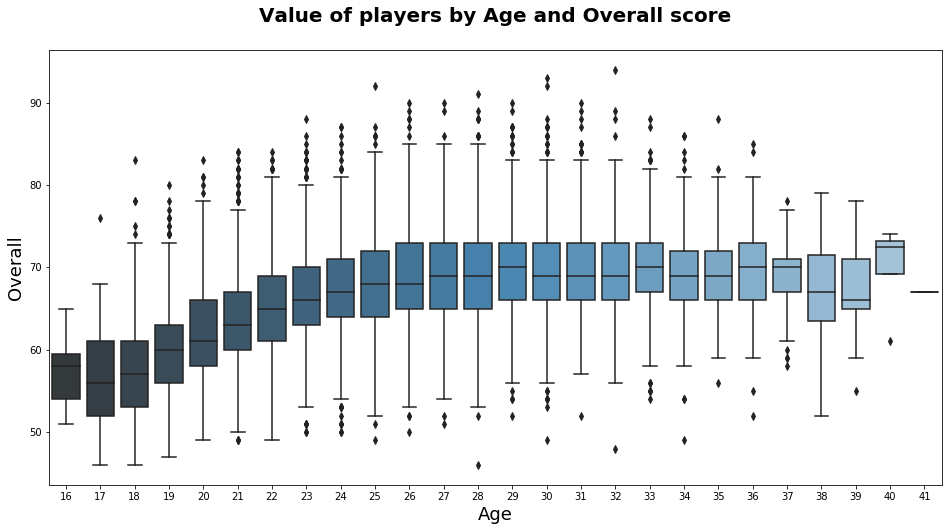

In [8]:
plt.figure(figsize=(16,8))
plt.title('Value of players by Age and Overall score', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Overall', fontsize=18)

sns.boxplot(df2["Age"], df2["Overall"], palette="Blues_d");

<a id='value'></a>
### Value and Wage

#### a. Converting to numbers

In [9]:
# Supporting function for converting string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    
df2['Value_Num'] = df['Value'].apply(lambda x: str2number(x))
df2['Wage_Num'] = df['Wage'].apply(lambda x: str2number(x))

df['Value_Num']=df2['Value_Num']
df['Wage_Num']=df2['Wage_Num']

#### b. Grouping players by value and wage

In [10]:
max_value = float(df2['Value_Num'].max() + 1)
max_wage = float(df2['Wage_Num'].max() + 1)

# Supporting function for creating category columns 'Value_Category' and 'Wage_Category'
def mappingAmount(x, max_amount):
    for i in range(0, 10):
        if x >= max_amount/10*i and x < max_amount/10*(i+1):
            return i
        
df2['Value_Category'] = df2['Value_Num'].apply(lambda x: mappingAmount(x, max_value))
df2['Wage_Category'] = df2['Wage_Num'].apply(lambda x: mappingAmount(x, max_wage))

In [11]:
mean_value = float(df2["Value_Num"].mean())
mean_wage = float(df2["Wage_Num"].mean())

# Supporting function for creating category columns 'OverMeanValue' and 'OverMeanWage'
def overValue(x, limit):
    if x > limit:
        return 1
    else:
        return 0
    
df2['OverMeanValue'] = df2['Value_Num'].apply(lambda x: overValue(x, mean_value))
df2['OverMeanWage'] = df2['Wage_Num'].apply(lambda x: overValue(x, mean_wage))

In [12]:
print('Mean value of player in FIFA 18 is around: €' + str(round(mean_value, -5)) + '.')

Mean value of player in FIFA 18 is around: €2500000.0.


In [13]:
players_value = df2.groupby("OverMeanValue").size().reset_index(name='Number_of_Players')
players_value

,OverMeanValue,Number_of_Players
0,0,12121
1,1,3625


In [14]:
print('3,625 players have a value over the mean of € '+str(round(mean_value, -5))+' which represents ' + str(round(3625/12121*100,1)) + '%.')

3,625 players have a value over the mean of € 2500000.0 which represents 29.9%.


In [15]:
print('Mean wage of player in FIFA 18 is around: €' + str(round(mean_wage, -3)) + '.')

Mean wage of player in FIFA 18 is around: €12000.0.


In [16]:
players_value = df2.groupby("OverMeanWage").size().reset_index(name='Number_of_Players')
players_value

,OverMeanWage,Number_of_Players
0,0,11778
1,1,3968


In [17]:
print('3,968 players have a wage over the mean of €'+ str(round(mean_wage, -3)) +' which represents ' + str(round(3968/11778*100,1)) + '%.')

3,968 players have a wage over the mean of €12000.0 which represents 33.7%.


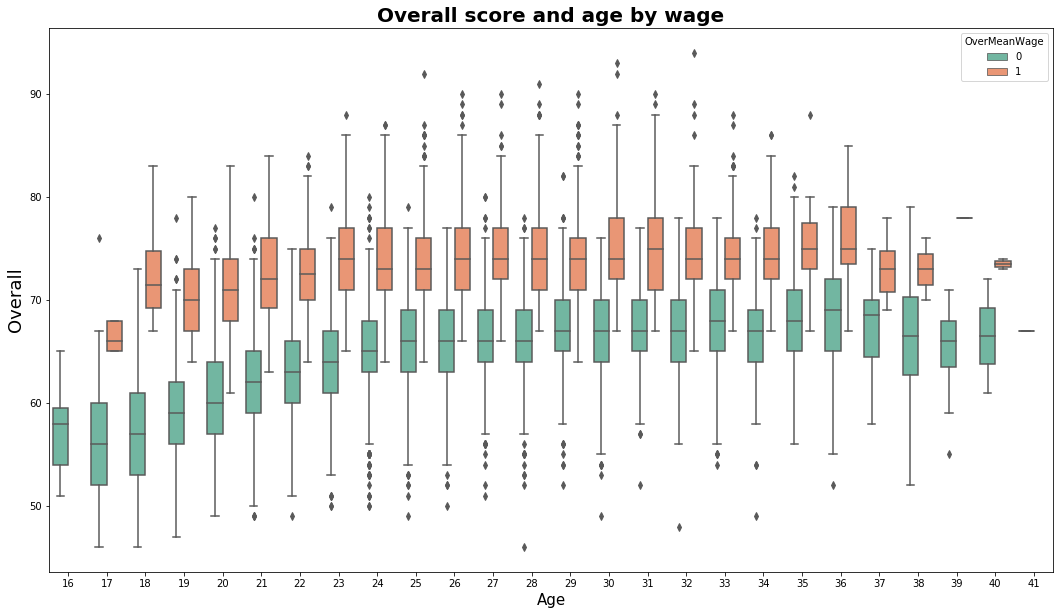

In [18]:
plt.figure(figsize=(18, 10))
plt.title('Overall score and age by wage', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Overall', fontsize=18)
sns.boxplot(x="Age", y="Overall", hue="OverMeanWage", data=df2, palette="Set2");

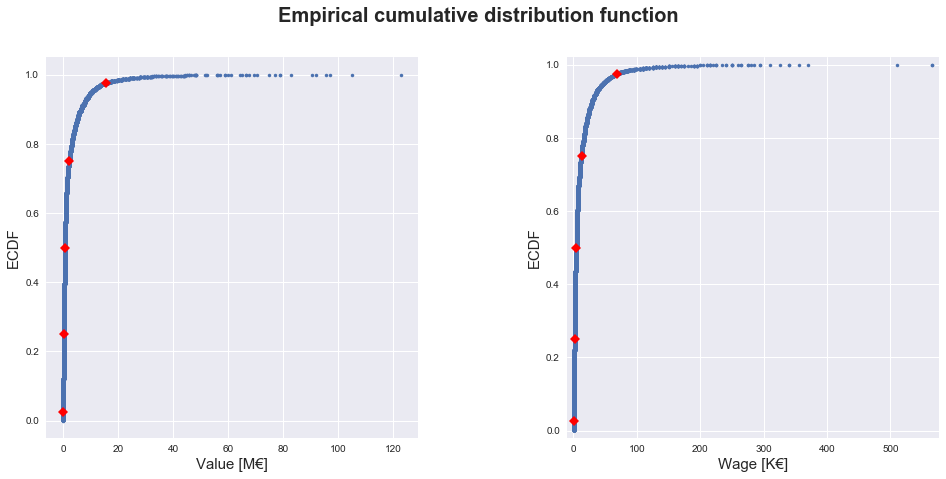

In [19]:
x = np.sort(df['Value_Num']/1000000)
y = np.arange(1,len(x)+1)/len(x)

x2 = np.sort(df['Wage_Num']/1000)
y2 = np.arange(1,len(x2)+1)/len(x2)

percentiles= np.array([2.5, 25, 50, 75, 97.5])

ptiles_x= np.percentile(x, percentiles)
ptiles_x2= np.percentile(x2, percentiles)

plt.figure(figsize=(16, 7))
sns.set()

plt.subplot(121)
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('Value [M€]', fontsize=15)
_ = plt.ylabel('ECDF', fontsize=15)
_ = plt.plot(ptiles_x, percentiles/100, marker='D', color='red',
         linestyle='none')
plt.suptitle('Empirical cumulative distribution function', fontsize=20, fontweight='bold')

plt.subplot(122)
_ = plt.plot(x2,y2,marker='.',linestyle='none')
_ = plt.xlabel('Wage [K€]', fontsize=15)
_ = plt.ylabel('ECDF', fontsize=15)
_ = plt.plot(ptiles_x2, percentiles/100, marker='D', color='red',
         linestyle='none')
             
plt.margins(0.02)
plt.subplots_adjust(wspace=0.4);

In [20]:
print(ptiles_x)

[ 0.08  0.35  0.75  2.3  15.5 ]


In [21]:
print(ptiles_x2)

[ 1.  2.  4. 13. 68.]


75% of players' value is less than 2.5 million Euros.<br>
75% of players' wage is less than 13,000 Euros.

#### Ten players with highest value

In [22]:
from IPython.display import HTML, display
sorted_players = df2.sort_values(["Value_Num"], ascending=False).head(10)
sorted_players[["Name" ,"Age" ,"Nationality", "Value", "Wage", "Overall"]]

,Name,Age,Nationality,Value,Wage,Overall
2,Neymar,25,Brazil,€123M,€280K,92
1,L. Messi,30,Argentina,€105M,€565K,93
3,L. Suárez,30,Uruguay,€97M,€510K,92
0,Cristiano Ronaldo,32,Portugal,€95.5M,€565K,94
5,R. Lewandowski,28,Poland,€92M,€355K,91
7,E. Hazard,26,Belgium,€90.5M,€295K,90
11,K. De Bruyne,26,Belgium,€83M,€285K,89
19,P. Dybala,23,Argentina,€79M,€215K,88
8,T. Kroos,27,Germany,€79M,€340K,90
9,G. Higuaín,29,Argentina,€77M,€275K,90


#### Ten players with highest wage

In [23]:
sorted_players = df2.sort_values(["Wage_Num"], ascending=False).head(10)
sorted_players[["Name" ,"Age" ,"Nationality", "Value", "Wage", "Overall"]]

,Name,Age,Nationality,Value,Wage,Overall
0,Cristiano Ronaldo,32,Portugal,€95.5M,€565K,94
1,L. Messi,30,Argentina,€105M,€565K,93
3,L. Suárez,30,Uruguay,€97M,€510K,92
15,G. Bale,27,Wales,€69.5M,€370K,89
5,R. Lewandowski,28,Poland,€92M,€355K,91
14,L. Modrić,31,Croatia,€57M,€340K,89
8,T. Kroos,27,Germany,€79M,€340K,90
16,S. Agüero,29,Argentina,€66.5M,€325K,89
10,Sergio Ramos,31,Spain,€52M,€310K,90
7,E. Hazard,26,Belgium,€90.5M,€295K,90


Cristiano Ronaldo, Messi and Suarez have the highest wage and overall scores (above 91). The most expensive player is Neymar.

<a id='top20'></a>
### Top 20 players' value and overall score

In [24]:
players_value = df2.sort_values("Value_Num", ascending=False).head(20).reset_index()[["Name", "Overall","Value_Num", "Age"]]

In [25]:
trace1 = go.Bar(
        x = players_value["Name"].tolist(),
        y = players_value["Overall"].tolist(),
        name='Overall',
        marker=dict(color='rgba(55, 128, 191, 0.7)',
        line=dict(color='rgba(55, 128, 191, 1.0)',
        width=2,)))

trace2 = go.Scatter(
        x = players_value["Name"].tolist(),
        y = (players_value["Value_Num"] / 1000000).tolist(),
        name='Value [M€]',
        mode = 'lines+markers',
        yaxis='y2')

data = [trace1, trace2]

layout = go.Layout(
        barmode='stack',
        title = 'Value of top 20 players',
        titlefont=dict(size=25),
        width=850,
        height=500,
        paper_bgcolor='rgb(244, 238, 225)',
        plot_bgcolor='rgb(244, 238, 225)',
        yaxis = dict(title= 'Overall',anchor = 'x',rangemode='tozero'),
    
xaxis = dict(title= 'Player Names'),
        yaxis2=dict(
        title='Value [M€]',
        titlefont=dict(color='rgb(148, 103, 189)'),
        tickfont=dict(color='rgb(148, 103, 189)'),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 20),
        legend=dict(x=0.05, y=0.05))


fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

<a id='country'></a>
### Number of players by country

In [26]:
df2["Nationality"].value_counts().head(20)

England                1455
Germany                 995
Spain                   900
France                  864
Argentina               860
Brazil                  749
Italy                   696
Colombia                538
Japan                   412
Republic of Ireland     370
Netherlands             366
Chile                   334
Sweden                  328
Portugal                326
United States           311
Mexico                  310
Denmark                 305
Norway                  301
Korea Republic          287
Poland                  284
Name: Nationality, dtype: int64

<a id='topcountry'></a>
### Number of top players by country

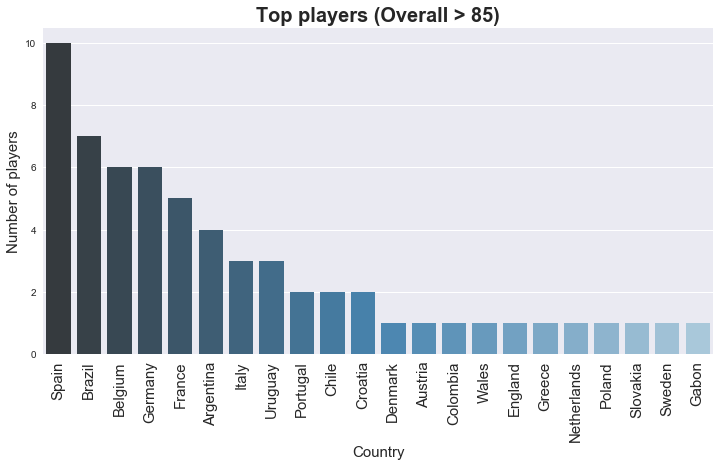

In [27]:
cutoff = 85
players = df[df['Overall']>cutoff]
grouped_players = df[df['Overall']>cutoff].groupby('Nationality')
number_of_players = grouped_players.count()['Name'].sort_values(ascending = False)

plt.figure(figsize=(12,6))
ax = sns.countplot(x = 'Nationality', data = players, order = number_of_players.index, 
                   palette='Blues_d')

ax.set_xticklabels(labels = number_of_players.index, rotation='vertical', fontsize=15)
ax.set_ylabel('Number of players', fontsize=15)
ax.set_xlabel('Country', fontsize=15)
ax.set_title('Top players (Overall > %.i)' %cutoff, fontsize=20, fontweight='bold');

<a id='topclub'></a>
### Number of top players by club

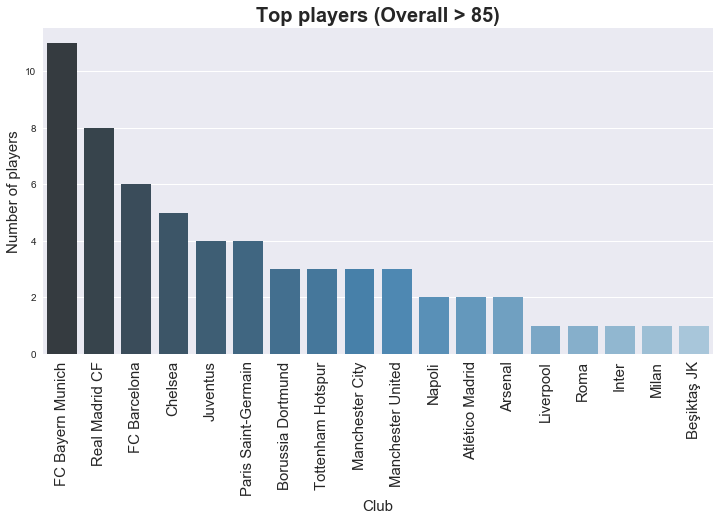

In [28]:
cutoff = 85
players = df[df['Overall']>cutoff]
grouped_players = df[df['Overall']>cutoff].groupby('Club')
number_of_players = grouped_players.count()['Name'].sort_values(ascending = False)

plt.figure(figsize=(12,6))
ax = sns.countplot(x = 'Club', data = players, order = number_of_players.index, 
                   palette='Blues_d')

ax.set_xticklabels(labels = number_of_players.index, rotation='vertical', fontsize=15)
ax.set_ylabel('Number of players', fontsize=15)
ax.set_xlabel('Club', fontsize=15)
ax.set_title('Top players (Overall > %.i)' %cutoff, fontsize=20, fontweight='bold');

<a id='corr'></a>
### Correlation matrix

In [29]:
# Converting objects to floats
d = (df.loc[:, ['Aggression','Stamina','Penalties']]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan))

In [30]:
d.head(3)

,Aggression,Stamina,Penalties
0,63.0,92.0,85.0
1,48.0,73.0,74.0
2,56.0,78.0,81.0


In [31]:
# Concatenating both dataframes
df_corr= df[['Overall','Age','Wage_Num']]
df_matrix = pd.concat([d,df_corr],axis=1)
df_matrix.head(3)

,Aggression,Stamina,Penalties,Overall,Age,Wage_Num
0,63.0,92.0,85.0,94,32,565000.0
1,48.0,73.0,74.0,93,30,565000.0
2,56.0,78.0,81.0,92,25,280000.0


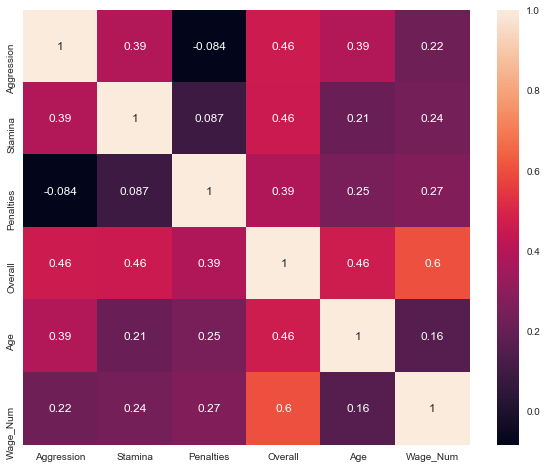

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_matrix.corr(), annot=True);

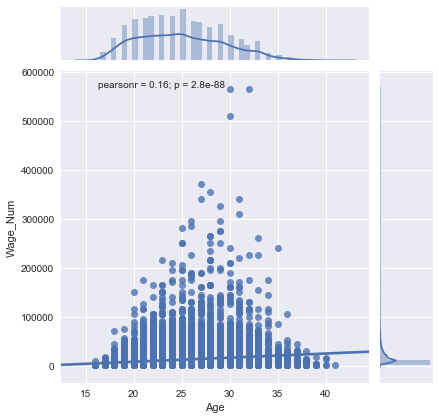

In [34]:
sns.jointplot("Age","Wage_Num", data=df, kind="reg");

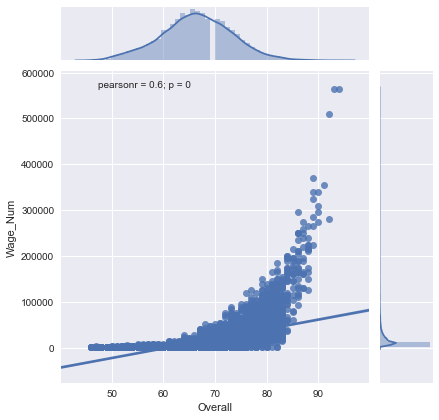

In [35]:
sns.jointplot("Overall","Wage_Num", data=df, kind="reg");

<a id='stat'></a>
## Statistical inference

In [36]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: 
    y= np.arange(1,n+1) / n
    
    return x, y

<a id='agenorm'></a>
### Checking normallity of Age and Overall score

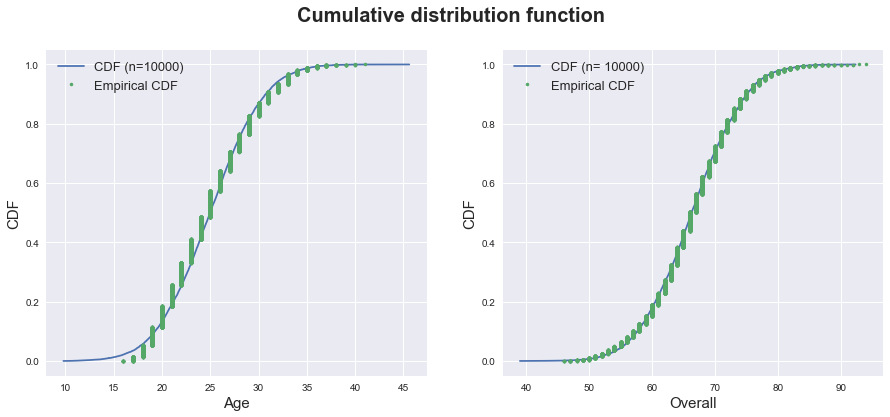

In [37]:
size=10000
mean = np.mean(df['Age'])
std = np.std(df['Age'])
samples = np.random.normal(mean, std, size=size)
age_x, age_y = ecdf(df['Age'])
theor_x, theor_y = ecdf(samples)

mean2 = np.mean(df['Overall'])
std2 = np.std(df['Overall'])
samples2 = np.random.normal(mean2, std2, size=size)
ove_x, ove_y = ecdf(df['Overall'])
theor_x2, theor_y2 = ecdf(samples2)

plt.figure(figsize=(15, 6))
sns.set()
plt.subplot(121)
_ = plt.plot(theor_x,theor_y)
_ = plt.plot(age_x,age_y,marker='.',linestyle='none')
_ = plt.xlabel('Age', fontsize=15)
_ = plt.ylabel('CDF', fontsize=15)
_ = plt.legend(('CDF (n=10000)','Empirical CDF'), loc=2, prop={'size': 13})
plt.suptitle('Cumulative distribution function', fontsize=20, fontweight='bold')

plt.subplot(122)
_ = plt.plot(theor_x2,theor_y2)
_ = plt.plot(ove_x,ove_y,marker='.',linestyle='none')
_ = plt.xlabel('Overall', fontsize=15)
_ = plt.ylabel('CDF', fontsize=15)
_ = plt.legend(('CDF (n= 10000)','Empirical CDF'), loc=2, prop={'sFize': 13});

Age of players are approximately normally distributed, while the distribution of overall score is closer to normal.

<a id='prob'></a>
### Probability of age and overall

In [38]:
# Computing the fraction of players that are over 20: prob
prob_more_30= np.sum(samples>30)/len(samples)
prob_more_80= np.sum(samples2>80)/len(samples2)

print('Probability of a player that is more than 30 years old:', prob_more_30)
print('Probability of a player with an overall score more than 80:', prob_more_80)

Probability of a player that is more than 30 years old: 0.1325
Probability of a player with an overall score more than 80: 0.0223


<a id='exp'></a>
### Wage

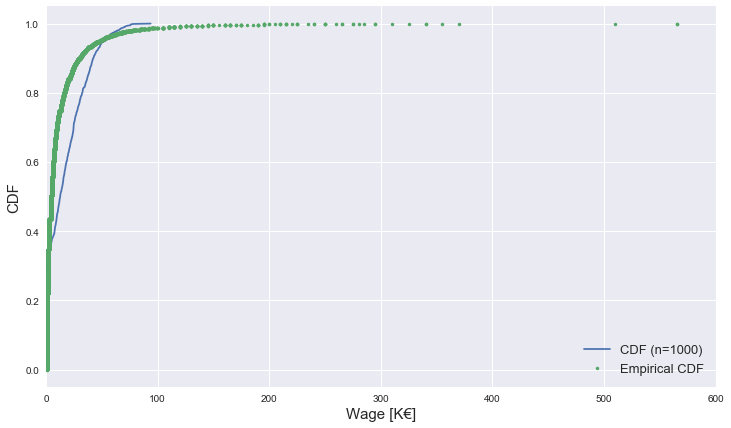

In [50]:
df['Wage_Num']=df['Wage_Num']/1000
mean_w=np.mean(df['Wage_Num'])
std_w = np.std(df['Wage_Num'])
samples_w = np.random.normal(mean_w, std_w, size=1000)
w_x, w_y = ecdf(df['Wage_Num'])
theor_wx, theor_wy = ecdf(samples_w)

plt.figure(figsize=(12, 7))
sns.set()
_ = plt.plot(theor_wx,theor_wy)
_ = plt.plot(w_x,w_y,marker='.',linestyle='none')
_ = plt.xlabel('Wage [K€]', fontsize=15)
_ = plt.ylabel('CDF', fontsize=15)
_ = plt.xlim(0,600)
_ = plt.legend(('CDF (n=1000)','Empirical CDF'), loc=4, prop={'size': 13});

<a id='t'></a>
## Hypothesis testing 
Significance level $\alpha$ = 0.05.<br><br>

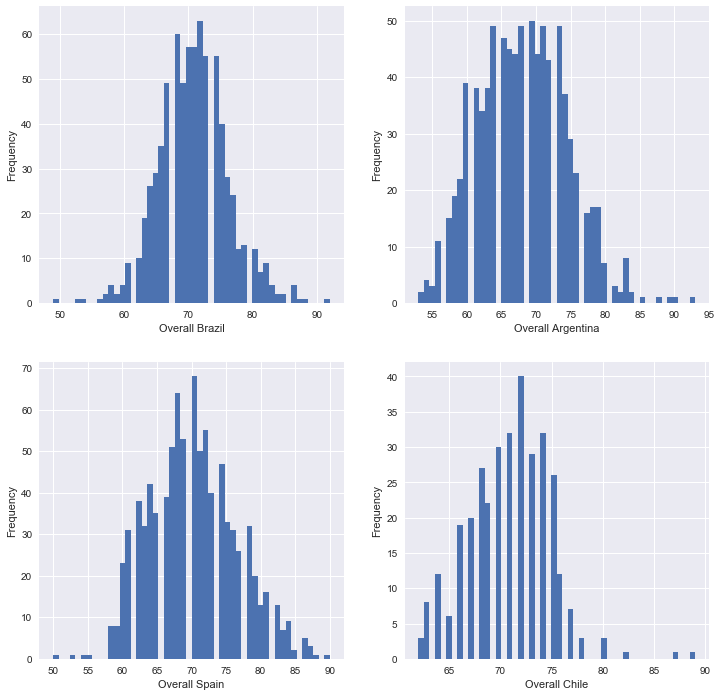

In [40]:
Argentina = df.loc[df['Nationality'] == 'Argentina']['Overall']
Brazil = df.loc[df['Nationality'] == 'Brazil']['Overall']
Spain = df.loc[df['Nationality'] == 'Spain']['Overall']
Chile = df.loc[df['Nationality'] == 'Chile']['Overall']
England = df.loc[df['Nationality'] == 'England']['Overall']

plt.figure(figsize=(12, 12))
sns.set()
plt.subplot(221)
_= plt.hist(Brazil,bins=50)
_= plt.xlabel('Overall Brazil')
_= plt.ylabel('Frequency')
plt.subplot(222)
_= plt.hist(Argentina,bins=50)
_= plt.xlabel('Overall Argentina')
_= plt.ylabel('Frequency')
plt.subplot(223)
_= plt.hist(Spain,bins=50)
_= plt.xlabel('Overall Spain')
_= plt.ylabel('Frequency')
plt.subplot(224)
_= plt.hist(Chile,bins=50)
_= plt.xlabel('Overall Chile')
_= plt.ylabel('Frequency');

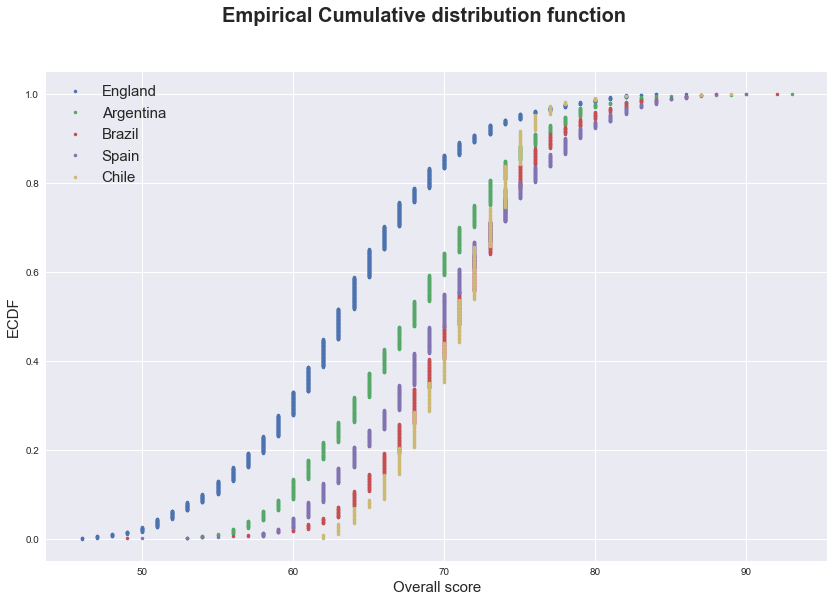

In [41]:
e_x, e_y = ecdf(England)
a_x, a_y = ecdf(Argentina)
b_x, b_y = ecdf(Brazil)
s_x, s_y = ecdf(Spain)
ch_x, ch_y = ecdf(Chile)

plt.figure(figsize=(14, 9))
sns.set()
_ = plt.plot(e_x,e_y,marker='.',linestyle='none')
_ = plt.plot(a_x,a_y,marker='.',linestyle='none')
_ = plt.plot(b_x,b_y,marker='.',linestyle='none')
_ = plt.plot(s_x,s_y,marker='.',linestyle='none')
_ = plt.plot(ch_x,ch_y,marker='.',linestyle='none')
_ = plt.xlabel('Overall score', fontsize=15)
_ = plt.ylabel('ECDF', fontsize=15)
_ = plt.legend(('England','Argentina','Brazil','Spain', 'Chile'), loc=2, prop={'size': 15})
plt.suptitle('Empirical Cumulative distribution function', fontsize=20, fontweight='bold');

In [42]:
perc = 50
ptiles_e= np.percentile(England, perc)
ptiles_a= np.percentile(Argentina, perc)
ptiles_s= np.percentile(Spain, perc)
ptiles_ch= np.percentile(Chile, perc)

print(('{0}% of England players have an overall score less than ').format(perc)+ str(ptiles_e))
print(('{0}% of Argentina players have an overall score less than ').format(perc)+ str(ptiles_a))
print(('{0}% of Spain players have an overall score less than ').format(perc)+ str(ptiles_s))
print(('{0}% of Chile players have an overall score less than ').format(perc)+ str(ptiles_s))

50% of England players have an overall score less than 63.0
50% of Argentina players have an overall score less than 68.0
50% of Spain players have an overall score less than 70.0
50% of Chile players have an overall score less than 70.0


In [43]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2



def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates



def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

<center>*H0: There is no difference of mean overall score between Argentina and England*</center>

In [44]:
diff_of_means(Argentina, England)

4.653036841684646

In [45]:
# Computing difference of mean overall acore
empirical_diff_means = diff_of_means(Argentina, England)

# Drawing 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(Argentina, England,diff_of_means, size=10000)

# Computing p-value: p
p = np.sum(perm_replicates >= empirical_diff_means)/ len(perm_replicates) 

print('p-value =', p)

p-value = 0.0


The p-value tells us that there is 0.0% chance that we would get the difference of means observed if England and Argentina were exactly the same.

<center>*H0: There is no difference of mean overall score between Brazil and Chile.*</center>

In [46]:
diff_of_means(Brazil, Chile)

-0.05788956133127954

In [47]:
# Computing difference of mean overall acore
empirical_diff_means = diff_of_means(Brazil, Chile)

# Drawing 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(Brazil, Chile,diff_of_means, size=10000)

# Computing p-value: p
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)

print('p-value =', p)

p-value = 0.4302


The p-value tells us that there is 42.8% chance that we would get the difference of means observed if Brazil and Chile were exactly the same. In other words,we failed to reject the null hypothesis.

<center>*H0: There is no difference of mean overall score between Brazil and Spain*</center>

In [48]:
diff_of_means(Brazil, Spain)

0.6772867527073174

In [49]:
# Computing difference of mean overall acore
empirical_diff_means = diff_of_means(Brazil, Spain)

# Drawing 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(Brazil, Spain,diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

print('p-value =', p)

p-value = 0.013


The p-value tells us that there is about 1% chance that we would get the difference of means observed if Brazil and Spain were exactly the same.

<a id='conc'></a>
## Conclusions

- The average age of players is 25 years old, ranging from 16 to 41 years old.
- The average overall score of 66, ranging between 46 to 94.
- Value of top 20 players ranges from 60 M€ to 123 M€.
- Mean value of player in FIFA 18 is around: €2500000 and 3,625 players have a value over the mean of € 2,500,000 which represents 29.9%.
- Mean wage of player in FIFA 18 is around: €12000 and 3,968 players have a wage over the mean of €12,000 which represents 33.7%.
- 75% of players' value is less than 2.5 M€.
- 75% of players' wage is less than €13,000.
- Top layer (overall score>85) are concentrated in Spain, Brazil, Belgium, Germany, France and Argentina.
- Clubs that have more top players are Bayern Munich, Real Madrid and Barcelona.
- 0.5% of England players have an overall score less than 47.0
- 0.5% of Argentina players have an overall score less than 54.0
- 0.5% of Spain players have an overall score less than 58.0
- 0.5% of Chile players have an overall score less than 58.0
- The mean overall score of players from Chile is the same than Brazil.